<a href="https://colab.research.google.com/github/Jing0130/python-algorithm/blob/master/Exploring_Beijing_Airbnb_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring Beijing Airbnb Data

## 数据处理

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
!apt install proj-bin libproj-dev libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/v1.1.0.tar.gz

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import statsmodels
import sklearn
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
from IPython.display import Image
from mpl_toolkits.basemap import Basemap
%matplotlib inline

listings = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/airbnb beijing/listings.csv')



In [21]:
listings.head()
#listings.columns.values

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,44054,https://www.airbnb.com/rooms/44054,20181115231633,2018-11-16,Modern and Comfortable Living in CBD,East Apartments offers comfortable living away...,East Apartments is a western managed serviced ...,East Apartments offers comfortable living away...,none,The neighborhood is a private compound. Just ...,...,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,11,0.85
1,100213,https://www.airbnb.com/rooms/100213,20181115231633,2018-11-16,The Great Wall Box Deluxe Suite A团园长城小院东院套房,This is your guide to live by the Great Wall! ...,This is your guide to live by the Great Wall! ...,This is your guide to live by the Great Wall! ...,none,"5 mins walk to Panglongshan Great Wall, 25 min...",...,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,4,0.13
2,128496,https://www.airbnb.com/rooms/128496,20181115231633,2018-11-16,Heart of Beijing: House with View 2,NaN,"确定一下我家真的适合你们｡非常简单的装修,非现代不豪华｡没有电视有线,因为我们不看国内电视节...","确定一下我家真的适合你们｡非常简单的装修,非现代不豪华｡没有电视有线,因为我们不看国内电视节...",none,NaN,...,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,2.84
3,161902,https://www.airbnb.com/rooms/161902,20181115231633,2018-11-16,cozy studio in center of Beijing,NaN,Forget about hotels that charge USD 200 or mor...,Forget about hotels that charge USD 200 or mor...,none,NaN,...,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,5,0.30
4,162144,https://www.airbnb.com/rooms/162144,20181115231633,2018-11-16,"nice studio near subway, sleep 4",NaN,Extended stay self-catering studio apartments ...,Extended stay self-catering studio apartments ...,none,NaN,...,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,5,0.43


In [0]:
listings.price = listings.price.apply(lambda x: x.split('.')[0]).replace('[^0-9]', '', regex=True).apply(lambda x: int(x)) 

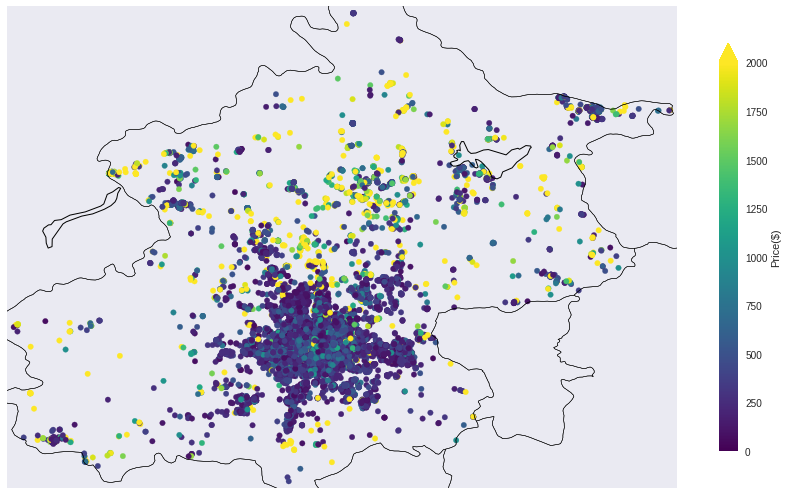

In [38]:
fig = plt.figure(figsize=(15,15))

##coordinates for plotting 

long_max = listings['longitude'].max() + .02
long_min = listings['longitude'].min() -.02
mid_long = (listings['longitude'].min() + listings['longitude'].max())/2

lat_max = listings['latitude'].max() + .02
lat_min = listings['latitude'].min() - .02
mid_lat = (listings['latitude'].min() + listings['latitude'].max())/2

m = Basemap(projection='cyl',lat_0=mid_lat,lon_0=mid_long,\
            llcrnrlat=lat_min,urcrnrlat=lat_max,\
            llcrnrlon=long_min,urcrnrlon=long_max,\
            rsphere=6371200.,resolution='h',area_thresh=10)
shp_info = m.readshapefile('/content/gdrive/My Drive/Colab Notebooks/airbnb beijing/CHN_adm_shp/CHN_adm1','states',drawbounds=True) # CHN_adm1的数据是中国各省区域
m.drawcoastlines()

cm = matplotlib.cm.get_cmap('viridis')
#normalize = matplotlib.colors.Normalize(vmin=min(listings['price']), vmax=max(listings['price']))
#colors = [cmap(normalize(value)) for value in listings['price']]
x, y = m(listings['longitude'], listings['latitude'])
sp = plt.scatter(x, y, c=listings['price'],s=30,cmap=cm)


cb=plt.colorbar(sp,shrink=0.5,pad=0.05,extend='max')
cb.set_label('Price($)')
plt.clim(0, 2000);
plt.show()
plt.clf()

